In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

2022-12-11 18:09:57.631551: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-11 18:09:57.783060: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-12-11 18:09:57.786437: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-11 18:09:57.786451: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore 

# 各パス指定

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'

# 分類数設定

In [3]:
NUM_CLASSES = 26

# 学習データ読み込み

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

2022-12-11 18:09:59.726002: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-12-11 18:09:59.726019: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-11 18:09:59.726030: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (akshay-Mi-NoteBook-Ultra): /proc/driver/nvidia/version does not exist
2022-12-11 18:09:59.726254: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 26)                286       
                                                                 
Total params: 1,356
Trainable params: 1,356
Non-trainable params: 0
_________________________________________________________________


In [9]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/39 [..............................] - ETA: 16s - loss: 3.2972 - accuracy: 0.0625
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
39/39 [==============================] - 1s 4ms/step - loss: 3.2625 - accuracy: 0.0437 - val_loss: 3.2230 - val_accuracy: 0.0760
Epoch 2/1000
31/39 [======================>.......] - ETA: 0s - loss: 3.2300 - accuracy: 0.0597
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
39/39 [==============================] - 0s 3ms/step - loss: 3.2255 - accuracy: 0.0646 - val_loss: 3.1835 - val_accuracy: 0.1177
Epoch 3/1000
 1/39 [..............................] - ETA: 0s - loss: 3.1690 - accuracy: 0.0781
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
39/39 [==============================] - 0s 2ms/step - loss: 3.1725 - accuracy: 0.0881 - val_loss: 3.1126 - val_accuracy: 0.1406
Epoch 4/1000
 1/39 [..............................] - ETA: 0s - loss: 3.1372 - accuracy: 0.0703


 1/39 [..............................] - ETA: 0s - loss: 1.7590 - accuracy: 0.4453
Epoch 28: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
39/39 [==============================] - 0s 2ms/step - loss: 1.8886 - accuracy: 0.3708 - val_loss: 1.3176 - val_accuracy: 0.7145
Epoch 29/1000
 1/39 [..............................] - ETA: 0s - loss: 1.8497 - accuracy: 0.4219
Epoch 29: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
39/39 [==============================] - 0s 2ms/step - loss: 1.8557 - accuracy: 0.3847 - val_loss: 1.2868 - val_accuracy: 0.7314
Epoch 30/1000
 1/39 [..............................] - ETA: 0s - loss: 1.9123 - accuracy: 0.3828
Epoch 30: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
39/39 [==============================] - 0s 2ms/step - loss: 1.8097 - accuracy: 0.3938 - val_loss: 1.2566 - val_accuracy: 0.7266
Epoch 31/1000
 1/39 [..............................] - ETA: 0s - loss: 1.8362 - accuracy: 0.3672
Epoch 31

 1/39 [..............................] - ETA: 0s - loss: 1.6878 - accuracy: 0.4453
Epoch 55: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
39/39 [==============================] - 0s 2ms/step - loss: 1.6518 - accuracy: 0.4324 - val_loss: 1.0321 - val_accuracy: 0.7634
Epoch 56/1000
 1/39 [..............................] - ETA: 0s - loss: 1.6252 - accuracy: 0.4141
Epoch 56: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
39/39 [==============================] - 0s 2ms/step - loss: 1.6438 - accuracy: 0.4364 - val_loss: 1.0232 - val_accuracy: 0.7574
Epoch 57/1000
 1/39 [..............................] - ETA: 0s - loss: 1.7473 - accuracy: 0.3594
Epoch 57: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
39/39 [==============================] - 0s 2ms/step - loss: 1.6304 - accuracy: 0.4370 - val_loss: 1.0178 - val_accuracy: 0.7707
Epoch 58/1000
 1/39 [..............................] - ETA: 0s - loss: 1.6052 - accuracy: 0.4219
Epoch 58

 1/39 [..............................] - ETA: 0s - loss: 1.4683 - accuracy: 0.5547
Epoch 82: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
39/39 [==============================] - 0s 2ms/step - loss: 1.5460 - accuracy: 0.4672 - val_loss: 0.9154 - val_accuracy: 0.7803
Epoch 83/1000
 1/39 [..............................] - ETA: 0s - loss: 1.6317 - accuracy: 0.4453
Epoch 83: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
39/39 [==============================] - 0s 2ms/step - loss: 1.5522 - accuracy: 0.4592 - val_loss: 0.9097 - val_accuracy: 0.7888
Epoch 84/1000
 1/39 [..............................] - ETA: 0s - loss: 1.4946 - accuracy: 0.5391
Epoch 84: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
39/39 [==============================] - 0s 2ms/step - loss: 1.5666 - accuracy: 0.4658 - val_loss: 0.9210 - val_accuracy: 0.7719
Epoch 85/1000
 1/39 [..............................] - ETA: 0s - loss: 1.5229 - accuracy: 0.4688
Epoch 85

 1/39 [..............................] - ETA: 0s - loss: 1.5806 - accuracy: 0.4922
Epoch 109: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
39/39 [==============================] - 0s 2ms/step - loss: 1.4977 - accuracy: 0.4946 - val_loss: 0.8496 - val_accuracy: 0.7930
Epoch 110/1000
 1/39 [..............................] - ETA: 0s - loss: 1.6391 - accuracy: 0.3828
Epoch 110: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
39/39 [==============================] - 0s 2ms/step - loss: 1.5082 - accuracy: 0.4771 - val_loss: 0.8436 - val_accuracy: 0.7972
Epoch 111/1000
 1/39 [..............................] - ETA: 0s - loss: 1.4804 - accuracy: 0.4922
Epoch 111: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
39/39 [==============================] - 0s 2ms/step - loss: 1.4538 - accuracy: 0.5002 - val_loss: 0.8449 - val_accuracy: 0.8111
Epoch 112/1000
 1/39 [..............................] - ETA: 0s - loss: 1.4522 - accuracy: 0.5000
Ep

Epoch 136/1000
 1/39 [..............................] - ETA: 0s - loss: 1.3525 - accuracy: 0.5938
Epoch 136: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
39/39 [==============================] - 0s 2ms/step - loss: 1.4625 - accuracy: 0.4956 - val_loss: 0.8216 - val_accuracy: 0.7972
Epoch 137/1000
 1/39 [..............................] - ETA: 0s - loss: 1.3380 - accuracy: 0.5000
Epoch 137: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
39/39 [==============================] - 0s 2ms/step - loss: 1.4459 - accuracy: 0.5000 - val_loss: 0.8132 - val_accuracy: 0.8123
Epoch 138/1000
 1/39 [..............................] - ETA: 0s - loss: 1.4559 - accuracy: 0.4922
Epoch 138: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
39/39 [==============================] - 0s 2ms/step - loss: 1.4366 - accuracy: 0.4986 - val_loss: 0.8102 - val_accuracy: 0.8069
Epoch 139/1000
 1/39 [..............................] - ETA: 0s - loss: 1.3952 - accu

Epoch 163/1000
 1/39 [..............................] - ETA: 0s - loss: 1.4226 - accuracy: 0.5547
Epoch 163: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
39/39 [==============================] - 0s 2ms/step - loss: 1.3935 - accuracy: 0.5155 - val_loss: 0.7844 - val_accuracy: 0.8075
Epoch 164/1000
 1/39 [..............................] - ETA: 0s - loss: 1.3824 - accuracy: 0.5000
Epoch 164: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
39/39 [==============================] - 0s 2ms/step - loss: 1.4393 - accuracy: 0.4976 - val_loss: 0.7932 - val_accuracy: 0.7972
Epoch 165/1000
 1/39 [..............................] - ETA: 0s - loss: 1.3577 - accuracy: 0.4922
Epoch 165: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
39/39 [==============================] - 0s 2ms/step - loss: 1.4181 - accuracy: 0.5131 - val_loss: 0.7849 - val_accuracy: 0.8159
Epoch 166/1000
 1/39 [..............................] - ETA: 0s - loss: 1.4192 - accu

Epoch 190/1000
 1/39 [..............................] - ETA: 0s - loss: 1.4271 - accuracy: 0.5078
Epoch 190: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
39/39 [==============================] - 0s 2ms/step - loss: 1.3601 - accuracy: 0.5227 - val_loss: 0.7534 - val_accuracy: 0.8105
Epoch 191/1000
 1/39 [..............................] - ETA: 0s - loss: 1.3009 - accuracy: 0.5469
Epoch 191: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
39/39 [==============================] - 0s 2ms/step - loss: 1.3772 - accuracy: 0.5223 - val_loss: 0.7602 - val_accuracy: 0.8183
Epoch 192/1000
 1/39 [..............................] - ETA: 0s - loss: 1.3954 - accuracy: 0.4922
Epoch 192: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
39/39 [==============================] - 0s 2ms/step - loss: 1.3867 - accuracy: 0.5217 - val_loss: 0.7592 - val_accuracy: 0.8117
Epoch 193/1000
 1/39 [..............................] - ETA: 0s - loss: 1.4091 - accu

Epoch 217/1000
 1/39 [..............................] - ETA: 0s - loss: 1.3840 - accuracy: 0.5156
Epoch 217: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
39/39 [==============================] - 0s 2ms/step - loss: 1.3421 - accuracy: 0.5324 - val_loss: 0.7262 - val_accuracy: 0.8045
Epoch 218/1000
 1/39 [..............................] - ETA: 0s - loss: 1.4821 - accuracy: 0.5312
Epoch 218: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
39/39 [==============================] - 0s 2ms/step - loss: 1.3357 - accuracy: 0.5354 - val_loss: 0.7221 - val_accuracy: 0.8189
Epoch 219/1000
 1/39 [..............................] - ETA: 0s - loss: 1.3893 - accuracy: 0.5625
Epoch 219: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
39/39 [==============================] - 0s 2ms/step - loss: 1.3232 - accuracy: 0.5433 - val_loss: 0.7331 - val_accuracy: 0.7990
Epoch 220/1000
 1/39 [..............................] - ETA: 0s - loss: 1.3444 - accu

Epoch 244/1000
 1/39 [..............................] - ETA: 0s - loss: 1.5034 - accuracy: 0.5703
Epoch 244: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
39/39 [==============================] - 0s 2ms/step - loss: 1.3010 - accuracy: 0.5555 - val_loss: 0.7150 - val_accuracy: 0.8008
Epoch 245/1000
 1/39 [..............................] - ETA: 0s - loss: 1.2097 - accuracy: 0.6250
Epoch 245: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
39/39 [==============================] - 0s 2ms/step - loss: 1.3111 - accuracy: 0.5493 - val_loss: 0.7121 - val_accuracy: 0.8105
Epoch 246/1000
 1/39 [..............................] - ETA: 0s - loss: 1.3888 - accuracy: 0.5625
Epoch 246: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
39/39 [==============================] - 0s 2ms/step - loss: 1.3246 - accuracy: 0.5475 - val_loss: 0.7144 - val_accuracy: 0.8075
Epoch 247/1000
 1/39 [..............................] - ETA: 0s - loss: 1.2709 - accu

Epoch 271/1000
 1/39 [..............................] - ETA: 0s - loss: 1.2626 - accuracy: 0.5312
Epoch 271: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
39/39 [==============================] - 0s 2ms/step - loss: 1.2897 - accuracy: 0.5590 - val_loss: 0.6759 - val_accuracy: 0.8280
Epoch 272/1000
 1/39 [..............................] - ETA: 0s - loss: 1.4526 - accuracy: 0.4922
Epoch 272: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
39/39 [==============================] - 0s 2ms/step - loss: 1.2836 - accuracy: 0.5644 - val_loss: 0.6929 - val_accuracy: 0.8057
Epoch 273/1000
 1/39 [..............................] - ETA: 0s - loss: 1.2658 - accuracy: 0.6250
Epoch 273: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
39/39 [==============================] - 0s 2ms/step - loss: 1.3048 - accuracy: 0.5489 - val_loss: 0.6878 - val_accuracy: 0.8328
Epoch 274/1000
 1/39 [..............................] - ETA: 0s - loss: 1.2163 - accu

In [12]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

13/13 [==============================] - 0s 809us/step - loss: 0.6992 - accuracy: 0.8117


In [13]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [14]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 46ms/step
[1.28168103e-04 8.52374919e-03 1.33403184e-04 1.41376415e-02
 3.81084252e-03 7.72549422e-04 1.00344645e-04 1.18989607e-04
 1.80947862e-03 1.41007637e-04 1.08663842e-01 1.69143789e-02
 1.73356035e-04 1.44170900e-03 3.58516525e-04 7.75228837e-05
 5.41431327e-05 2.21872404e-01 1.37484889e-03 1.12154125e-03
 3.55160654e-01 1.74445361e-01 5.83711639e-02 2.06719283e-02
 2.04194948e-04 9.41825379e-03]
20


# 混同行列

52/52 [==============================] - 0s 645us/step


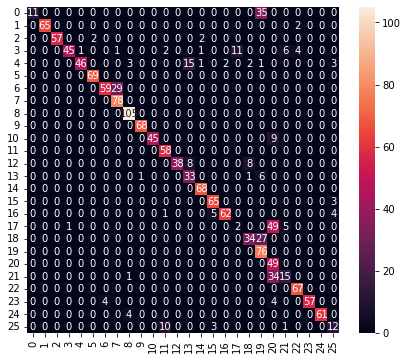

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.24      0.39        46
           1       1.00      0.97      0.98        67
           2       1.00      0.93      0.97        61
           3       0.98      0.63      0.77        71
           4       0.98      0.63      0.77        73
           5       0.97      1.00      0.99        69
           6       0.94      0.67      0.78        88
           7       0.72      1.00      0.84        78
           8       0.93      1.00      0.96       105
           9       0.99      1.00      0.99        68
          10       1.00      0.83      0.91        54
          11       0.82      1.00      0.90        58
          12       1.00      0.70      0.83        54
          13       0.59      0.80      0.68        41
          14       0.94      1.00      0.97        68
          15       0.89      0.96      0.92        68
          16       0.97      0.86      0.91        72
     

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [16]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

In [17]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /tmp/tmpldo_obaw/assets


INFO:tensorflow:Assets written to: /tmp/tmpldo_obaw/assets
2022-12-11 18:10:22.461034: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2022-12-11 18:10:22.461060: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2022-12-11 18:10:22.461615: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /tmp/tmpldo_obaw
2022-12-11 18:10:22.462492: I tensorflow/cc/saved_model/reader.cc:89] Reading meta graph with tags { serve }
2022-12-11 18:10:22.462509: I tensorflow/cc/saved_model/reader.cc:130] Reading SavedModel debug info (if present) from: /tmp/tmpldo_obaw
2022-12-11 18:10:22.465108: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:357] MLIR V1 optimization pass is not enabled
2022-12-11 18:10:22.465824: I tensorflow/cc/saved_model/loader.cc:229] Restoring SavedModel bundle.
2022-12-11 18:10:22.492192: I tensorflow/cc/saved_model/loader.cc:213] Running initializatio

7512

# 推論テスト

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [19]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 100 µs, sys: 7 µs, total: 107 µs
Wall time: 78.9 µs


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[1.28168103e-04 8.52375012e-03 1.33403300e-04 1.41376453e-02
 3.81084089e-03 7.72549014e-04 1.00344638e-04 1.18989505e-04
 1.80947862e-03 1.41007491e-04 1.08663835e-01 1.69143844e-02
 1.73355947e-04 1.44170818e-03 3.58516205e-04 7.75228764e-05
 5.41431291e-05 2.21872404e-01 1.37484830e-03 1.12154067e-03
 3.55160654e-01 1.74445316e-01 5.83711825e-02 2.06719320e-02
 2.04194846e-04 9.41825379e-03]
20
